In [118]:
import re

import pandas as pd

from pathlib import Path

from pythainlp.tokenize import word_tokenize
from tqdm import tqdm_notebook

# For visualization
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# params
pd.set_option("max_colwidth", 0)
sns.set_context("talk")
sns.set_palette(sns.color_palette("colorblind", 10))

%matplotlib inline
matplotlib.rc("font", family="TH Sarabun New")

In [119]:
data_folder = Path("./New folder/kaggle-competition/")

In [164]:
# # Generate _train.csv from traint.txt and train_label.txt
# texts = []
# labels = []

# with open(data_folder / "train.txt") as f:
#     for line in f:
#         texts.append(line.strip())

# with open(data_folder / "train_label.txt") as f:
#     for line in f:
#         labels.append(line.strip())

# df = pd.DataFrame({ "category": labels, "texts": texts })
# del texts
# del labels

# df.to_csv("_train.csv", index=False)
# df.shape
import csv
file1_path = './train.txt'
file2_path = './train_label.txt'
dat = {'text': [], 'sentiment': []}

# อ่านข้อมูลจากไฟล์1
with open(file1_path, 'r', encoding='utf-8') as file1:
    data1 = file1.readlines()
    dat['text'].append(data1.strip())

# อ่านข้อมูลจากไฟล์2
with open(file2_path, 'r', encoding='utf-8') as file2:
    data2 = file2.readlines()
    dat['sentiment'].append(data2.strip())

df = pd.DataFrame({ "category":  dat['sentiment'], "texts": dat['text'] })

with open("_train.csv", 'w', newline='', encoding='utf-8-sig') as csv_file:
    csv_writer = csv.writer(csv_file)

    # เขียนหัวข้อคอลัมน์

    # เขียนข้อมูลลงในไฟล์ CSV
    for i in range(len(dat['text'])):
        csv_writer.writerow([dat['sentiment'][i].strip(),dat['text'][i].strip()])


# df.to_csv("_train.csv", index=False,  encoding='utf-8-sig')
# df.shape
# csv_file_path = 'output.csv'

# # เขียนข้อมูลลงในไฟล์ CSV
# with open(csv_file_path, 'w', newline='', encoding='utf-8-sig') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # เขียนหัวข้อคอลัมน์

#     # เขียนข้อมูลลงในไฟล์ CSV
#     for i in range(len(dat['text'])):
#         csv_writer.writerow([dat['sentiment'][i].strip(),dat['text'][i].strip()])

# print(f'ไฟล์ CSV ถูกสร้างที่: {csv_file_path}')




In [168]:
texts = []
labels = []

with open(data_folder / "test.txt",encoding='utf-8-sig') as f:
    for line in f:
        texts.append(line.strip())

test_df = pd.DataFrame({ "category": "neu", "texts": texts })
del texts
del labels

test_df.to_csv("_test.csv", index=False)
test_df.shape

(2674, 2)

In [169]:
df.describe()

,category,texts
count,24063,24063
unique,4,24014
top,neu\n,#ERROR!\n
freq,13105,31


In [170]:
df.groupby("category").describe()

texts         \
          count unique   
category                 
neg\n     6140   6129    
neu\n     13105  13087   
pos\n     4300   4300    
q\n       518    518     

                                                                                         \
                                                                                    top   
category                                                                                  
neg\n     #ERROR!\n                                                                       
neu\n     #ERROR!\n                                                                       
pos\n     สนใจ ฟอจูนเนอร์ สีขาวครับ\n                                                     
q\n       นิสสัน suv ที่เพิ่งเปิดตัวที่ฟิลิบปินส์เป็นไงบ้างครับ สมรรถภาพ มาไทยเมื่อไร\n   

               
         freq  
category       
neg\n     12   
neu\n     19   
pos\n     1    
q\n       1

<Axes: xlabel='category'>

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


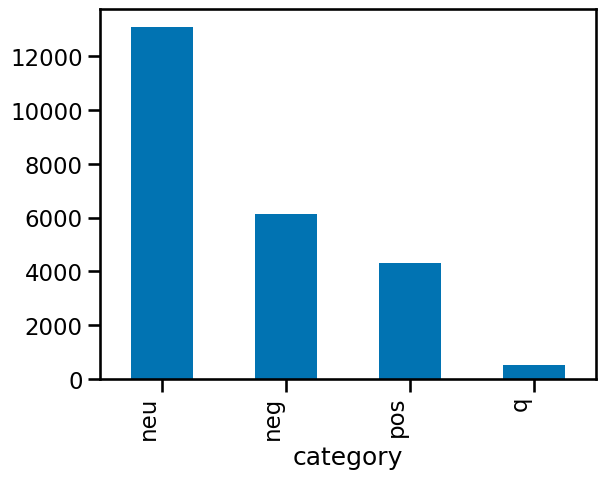

In [171]:
df['category'].value_counts().plot.bar()

Text lenght

In [172]:
df["length"] = df["texts"].apply(word_tokenize).apply(len)
df.head()

,category,texts,length
0,neu\n,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ\n,14
1,neu\n,คะ\n,2
2,neg\n,อิเหี้ยออมทำกูอยากกินเอ็มเค\n,10
3,neu\n,😅😅😅\n,2
4,neu\n,สวัสดีวันพุธ แนน อะไรนะ\n,9


<Axes: >

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


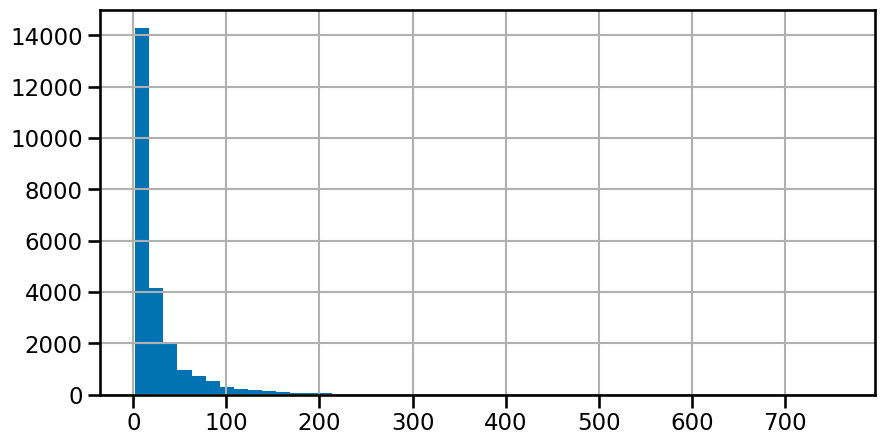

In [125]:
df["length"].hist(bins=50, figsize=(10, 5))

In [126]:
df["length"].describe()

count    24063.000000
mean     28.135062   
std      44.813350   
min      2.000000    
25%      7.000000    
50%      13.000000   
75%      30.000000   
max      759.000000  
Name: length, dtype: float64

In [127]:
df[df["length"] >= 749]

,category,texts,length
5889,neu\n,"และงานใหญ่ประจำปี บ้ตร sold out ทุกปี - ขายบัตรแล้ว!! พร้อมเพิ่มวง LIPTA - ถึงเวลารวม ชนเผ่า Johnnie Walker present 20Something On The Beach 2018 ""ชน เผ่า เมา เต้น"" ▶ THAITANIUM ▶ UrboyTJ ▶ COCKTAIL ▶ MILD ▶ LIPTA ▶ MUSKETEERS X BETTERWEATHER ▶ บริษัทฮาไม่จำกัด (บอล,ค่อม,ตั๊ก,โรเบิร์ต สายควัน) ▶ Dj Taidy Dj MMM Mc YongHulk ▶ GiraffNoi / RAVEN DOLL PARTY แบบ nonstop ไม่มี dead air DJ สลับ ศิลปินตลอดงาน @The Zign pattaya Sat 03/03/2018 16.00 - until late AGE : 18+ Dress Code : ชนเผ่า ----------------------------------------------- งานแบ่งเป็น 2 zone * Zone Regular : อยู่ด้านหลังไม่ติดเวที มีโต๊ะให้บางส่วน ไม่มีการจอง มาก่อนได้ก่อน ไม่ได้มีพอกับทุกคน เข้า zone vip ไม่ได้ (บัตรทุกราคา free mixer all night) * Regular Ticket - Pre sale : 900 ฿ - Door sale : 1,200 ฿ * Regular Package : 4,900฿ (ไม่มีบุ๊คโต๊ะ ไปก่อนได้ก่อน) - ห้องพัก the zign 1 ห้อง - บัตร regular 2 ใบ - บัตรอาหารเช้า 2 ท่าน — *Zone VIP : อยู่ด้านหน้าติดเวที Zone นี้ทุกโต๊ะจะต้องจองเท่านั้น สำหรับคนที่ ซื้อบัตร vip แยกเป็นใบๆ ต้องมีเพื่อนจองโต๊ะแล้วเท่านั้น ไม่งั้นเข้าไป คุณจะไม่มีโต๊ะ * VIP Ticket (limited) - 1,500 ฿ * VIP Package A : 15,000 ฿ (มีบุ๊คโต๊ะ) - ห้องพัก the zign 1 ห้อง - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch 2 ขวด - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน * VIP Package B : 12,000 ฿ (มีบุ๊คโต๊ะ) (สำหรับคนไม่เอาห้อง) - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night * VIP Package C : 6,100 ฿ (ไม่มีบุ๊คโต๊ะ) (สำหรับคนที่เพื่อนซื้อโต๊ะแล้ว) - ห้องพัก the zign 1 ห้อง - บัตร vip 2 ใบ - VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน ----------------------------------------------- ซื้อบัตรคลิก : http://go.eventpop.me/20STHONTHEBEACH2018 ซื้อบัตรกับทางร้าน (เฉพาะโต๊ะ vip zone ครึ่งหลัง) LINE@20sth : https://goo.gl/ujgAK4 Party by ""20STH TEAM"" #20somethingonthebeach2018 #20somethingonthebeach #ชนเผ่าเมาเต้น\n",759
6103,neu\n,"และงานใหญ่ประจำปี ขายบัตรแล้ว!! พร้อมเพิ่มวง LIPTA - ถึงเวลารวม ชนเผ่า Johnnie Walker present 20Something On The Beach 2018 ""ชน เผ่า เมา เต้น"" ▶ THAITANIUM ▶ UrboyTJ ▶ COCKTAIL ▶ MILD ▶ LIPTA ▶ MUSKETEERS X BETTERWEATHER ▶ บริษัทฮาไม่จำกัด (บอล,ค่อม,ตั๊ก,โรเบิร์ต สายควัน) ▶ Dj Taidy Dj MMM Mc YongHulk ▶ GiraffNoi / RAVEN DOLL PARTY แบบ nonstop ไม่มี dead air DJ สลับ ศิลปินตลอดงาน @The Zign pattaya Sat 03/03/2018 16.00 - until late AGE : 18+ Dress Code : ชนเผ่า ----------------------------------------------- งานแบ่งเป็น 2 zone * Zone Regular : อยู่ด้านหลังไม่ติดเวที มีโต๊ะให้บางส่วน ไม่มีการจอง มาก่อนได้ก่อน ไม่ได้มีพอกับทุกคน เข้า zone vip ไม่ได้ (บัตรทุกราคา free mixer all night) * Regular Ticket - Pre sale : 900 ฿ - Door sale : 1,200 ฿ * Regular Package : 4,900฿ (ไม่มีบุ๊คโต๊ะ ไปก่อนได้ก่อน) - ห้องพัก the zign 1 ห้อง - บัตร regular 2 ใบ - บัตรอาหารเช้า 2 ท่าน — *Zone VIP : อยู่ด้านหน้าติดเวที Zone นี้ทุกโต๊ะจะต้องจองเท่านั้น สำหรับคนที่ ซื้อบัตร vip แยกเป็นใบๆ ต้องมีเพื่อนจองโต๊ะแล้วเท่านั้น ไม่งั้นเข้าไป คุณจะไม่มีโต๊ะ * VIP Ticket (limited) - 1,500 ฿ * VIP Package A : 15,000 ฿ (มีบุ๊คโต๊ะ) - ห้องพัก the zign 1 ห้อง - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch 2 ขวด - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน * VIP Package B : 12,000 ฿ (มีบุ๊คโต๊ะ) (สำหรับคนไม่เอาห้อง) - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night * VIP Package C : 6,100 ฿ (ไม่มีบุ๊คโต๊ะ) (สำหรับคนที่เพื่อนซื้อโต๊ะแล้ว) - ห้องพัก the zign 1 ห้อง - บัตร vip 2 ใบ - VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน ----------------------------------------------- ซื้อบัตรคลิก : http://go.eventpop.me/20STHONTHEBEACH2018 ซื้อบัตรกับทางร้าน (เฉพาะโต๊ะ vip zone ครึ่งหลัง) LINE@20sth : https://goo.gl/ujgAK4 Party by ""20STH TEAM"" #20somethingonthebeach2018 #20somethingonthebeach #ชนเผ่าเม

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


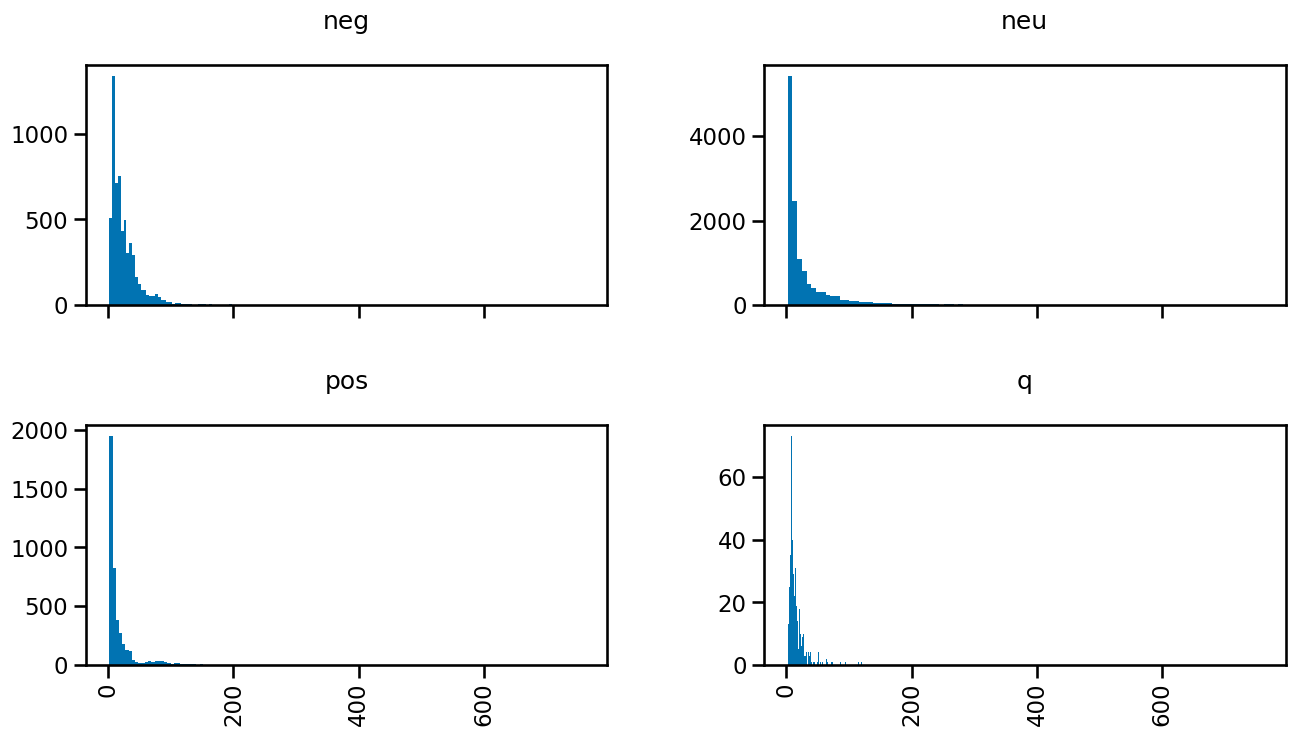

In [128]:
df.hist(column="length", by="category", bins=100, figsize=(15,8), sharex=True)
plt.show()

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


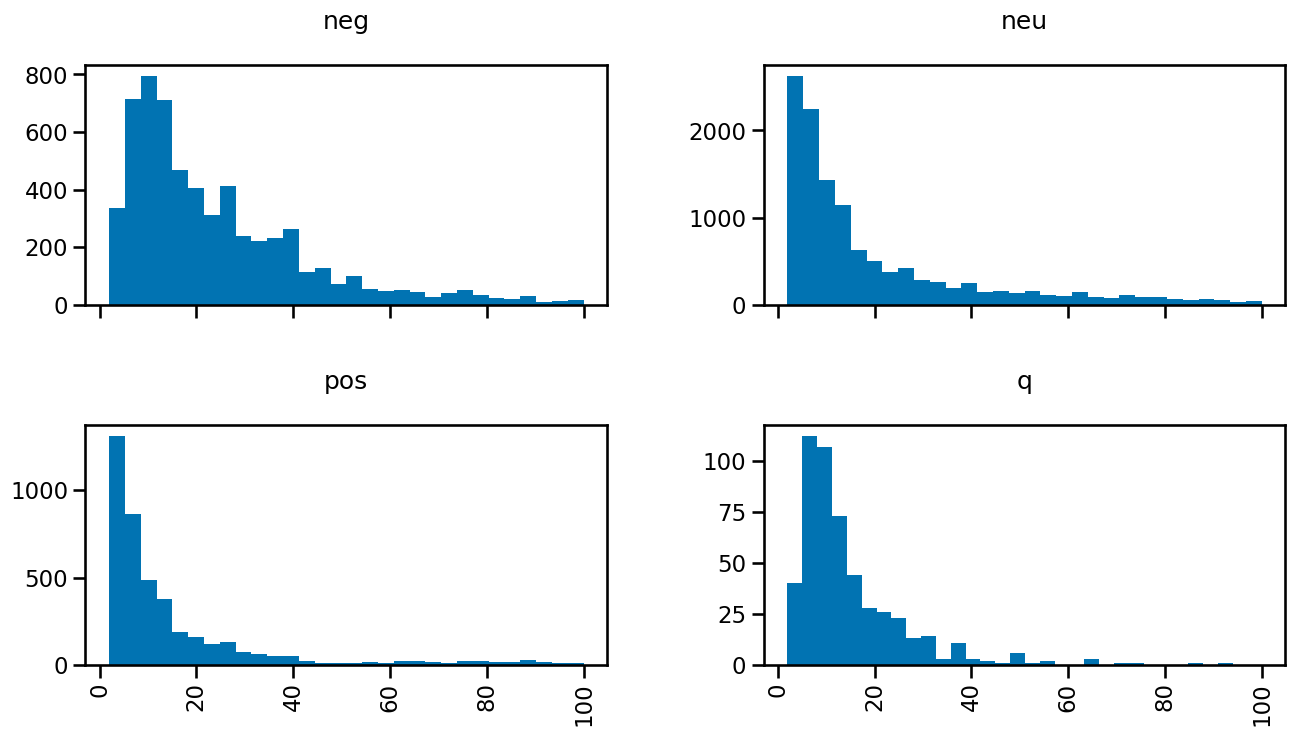

In [129]:
df[df["length"] <= 100].hist(column="length", by="category", bins=30, figsize=(15,8), sharex=True)
plt.show()

In [130]:
import string
import emoji_data_python
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [131]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ["feature", "score"]

    return df

In [132]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''

    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)

    return top_feats(tfidf_means, features, top_n)

In [133]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''

    dfs = []
    labels = np.unique(y)

    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)

    return dfs

In [134]:
def plot_classfeats_h(dfs, score_name=''):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))

    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel(f"Mean {score_name} Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)

    plt.show()

In [135]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names_out())

    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + dataframe.label]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [136]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?\.([\da-z-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(str):
    return [c for c in str if c in emoji.EMOJI_DATA]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9ก-๙]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

## TF-IDF

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'TH Sarabun New' not found.
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rosary\Deskt

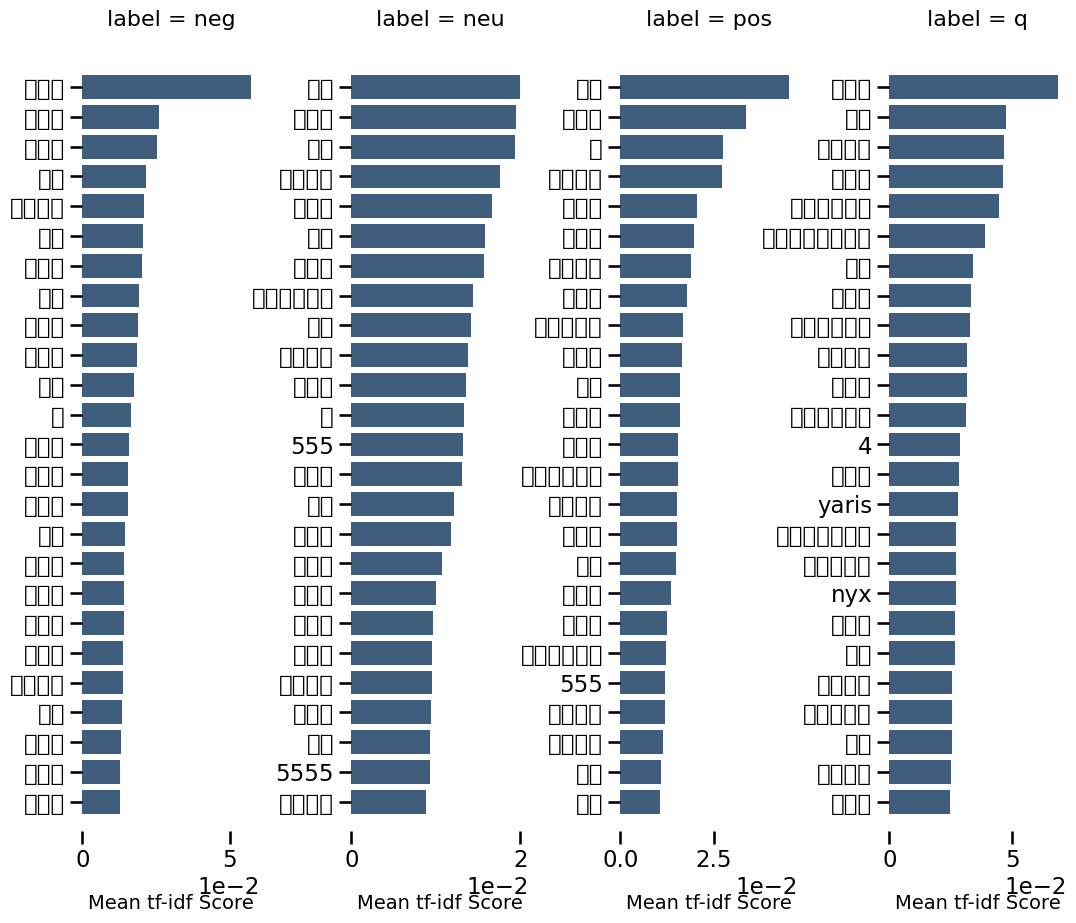

In [137]:
show_classfeats(
    df=df[:1000],
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

In [138]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_emojis, is_emoji=True)

,neg\n,tfidf_neg\n,neu\n,tfidf_neu\n,pos\n,tfidf_pos\n,q\n,tfidf_q\n
0,😂,0.017554,😂,0.007692,😂,0.013105,😂,0.006542
1,😭,0.010715,😍,0.004362,😍,0.010567,😍,0.003861
2,🤣,0.003469,❤,0.003273,😁,0.007655,🤔,0.003861
3,😅,0.003061,😁,0.003214,😘,0.006371,😭,0.003709
4,😢,0.002805,🏻,0.002964,❤,0.005362,😋,0.001931
5,🙄,0.002556,👉,0.002960,😋,0.004706,😮,0.001931
6,😡,0.002058,😊,0.002883,😊,0.004368,😩,0.001931
7,😁,0.002024,🤣,0.002870,😆,0.003676,😙,0.001931
8,😑,0.001852,🙏,0.002357,🤤,0.003664,👀,0.001931
9,😒,0.001602,📍,0.002259,👍,0.003334,🎻,0.000000


findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


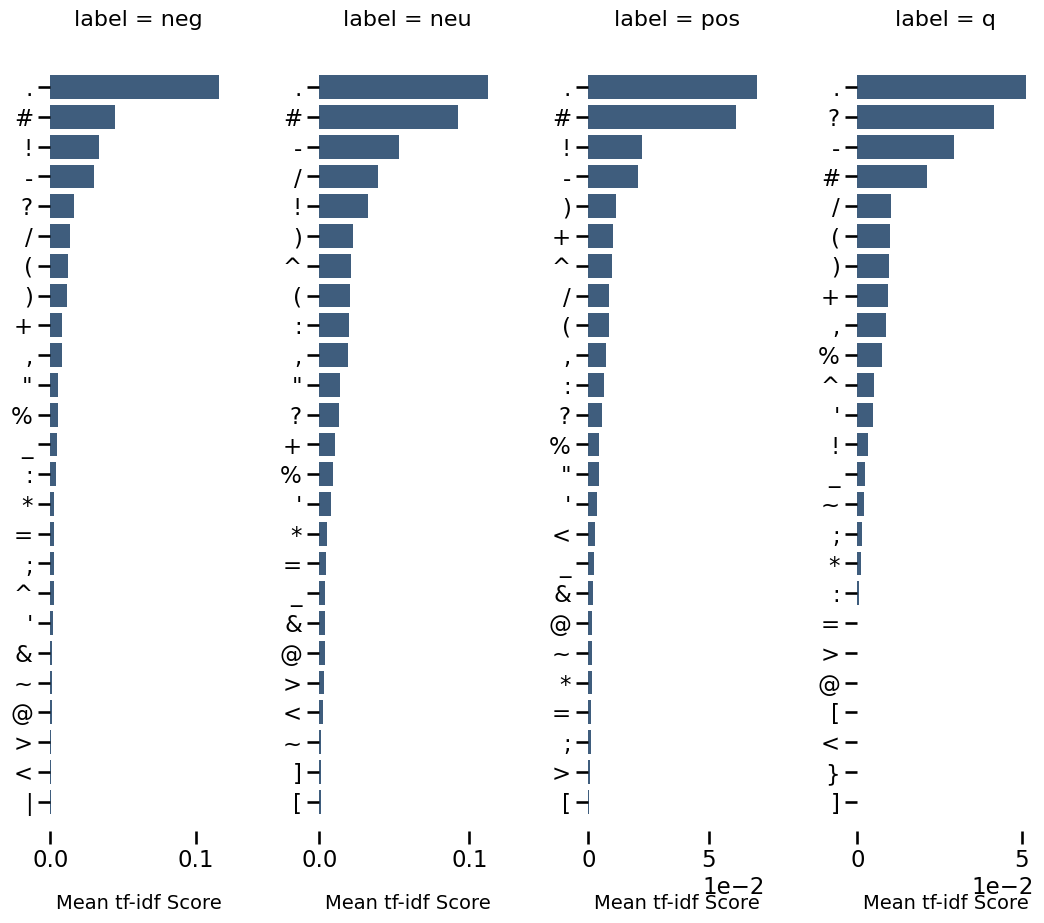

In [139]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_punc)

findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.
findfont: Font family 'TH Sarabun New' not found.


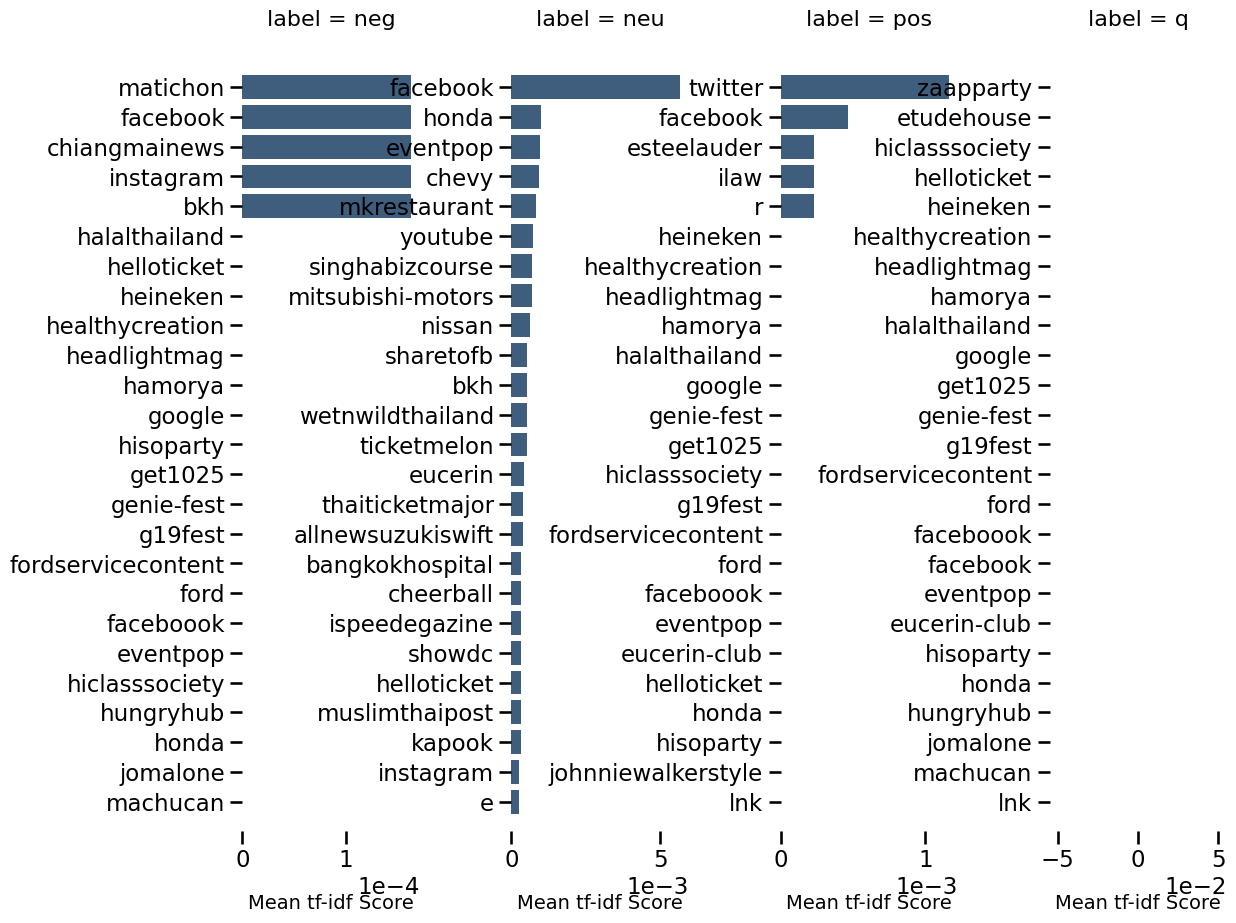

In [140]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_url)

In [160]:
neu_df = df[df.category == "neu\n"].sample(5000)
neu_df.head()

,category,texts,length
13552,neu\n,ช่วยเก็บผ้าเช็ดหน้า-triump kingdom #SangSom #RedefineFullMoon #TheNorthFullmoonParty\n,16
13499,neu\n,ขอสีเขียวด้วยนะคะ\n,6
7552,neu\n,เมียจ่าาาาา\n,4
12738,neu\n,ไม่อดค่าาา คุณลูกค้าอดใจรออีกนิดนะคะ แอดมินจะนำโปรโมชั่นวันเกิดที่สุดแสนไฉไลมาแจ้งให้ทราบแน่นอนค่ะ ^^\n,28
21812,neu\n,#PPV น้องใหม่บนแดนมังกร !! #Thaicarlover #รถใหม่ #Nissan\n,19


In [163]:
neu_df = df[df.category == "pos\n"].sample(5000)
neu_df.head()

ValueError: Cannot take a larger sample than population when 'replace=False'